# Quick test 1

In [1]:
using ForneyLab       # based on last official release
using LinearAlgebra
using Plots
using PyPlot
using ProgressMeter
using Compat
using WAV
using Base64
using FileIO
using HDF5
using FLAC
using DSP
using LAR
using LAR.AR
using LAR.DataAR

using FFTW


include("functions/auxiliary/buffer.jl")
include("functions/auxiliary/audioplayer.jl")
include("functions/auxiliary/workflow.jl")
include("functions/auxiliary/fourier.jl")
;

## Load signal

In [2]:
# specify desired sampling frequency
fs_desired = 16000

# load and process drilling sound
x_drill, fs_drill = wavread("data/drilling.wav", format="native")
fs_drill = Int(fs_drill)
x_drill = x_drill[11*fs_drill+1:14*fs_drill]
x_drill = resample(x_drill, fs_desired/fs_drill)
x_drill = 100*x_drill/var(x_drill)

# specify time axis
t = collect((1:length(x_drill))/fs_desired)

# create plots of {drill, speech, combined}
audioplayers(x_drill, fs=fs_desired)
;

<source src="data:audio/wav;base64,UklGRjzuAgBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDuAgDYTNG42fvFuGjpGTlHnjk5J8+COWucpznRhZE5tkiFOUtjUDkj7mo5F0UuOe4bDDn2rhA3PfKMudlN0Lk3bve5VZ4Fuo49HbpOeyO6K8EFukddxrnaSrm5VGG0uWFl5bmLyuS5qSWOuX8+v7jeDzM4P8KLt7RTz7eoM3u35nz/uCe56rjzc1y56Vz9uBN58DeZWLI451gpOY0fXzmPafM4lVk2tiWYpTfUibw4fPpoOWCnjjikNY22hhLpOKOb+TcWMS44Hho8tvuCE7hXKCK5MeR0uamlqrmJ8+a5ET7YuRXkfbmTAla5VkT5uGPxKrkxLwi5vKGsuLh9P7ntfhC5F2qbN7ALuDhCqkU5sSStOfMRmjmfaDw5fuWMOaAZjzl3D9M4rzhiuAkfCrlagw65gD2ut8iVCLmcFyy5Ezd5t+GEoDjjHDI4QGFBOAxCqDhriJA58g2+ORX/ADosrfY5o83VOVytlTnt3BU5vpfHOEC+MTdV9Ri5OyGKuftaprg9BcQ3wp5QuIBx87ip5Fm5+QaIuSOL/bh0XzU3Fs6DOKFJUTlYO4g5FWSPORTZYjn5Yyg4UMG6NBSwpLdyoYA4/yiuNkR42Tdrpl+4qEwvucDtG7lZXpm50CfZuQ+g6Lmkur250EMpucY9tDixnpo5oVzVOaf+BTogp/c5ekN3OUdu1zhekBo5jo5YN3FdbbktRYa5vmlbucVVgbn1a5S5dkvyuWQ1Brogwea53ibnuSwdxbnG0Pa51KnruRbri7mHQRq5l2EwuSvfXbkNrk65okEnuHpeJDnZGxQ6QlEPOgdk0TmRODs5srLst7DsQTeg3UC3gToOueHUd7kNofG4vLg8OZZl9TlNsMA52A5VOSc/ZznkhpM5RvPWOeizCzoUgxA6nCPAOeSzgzmbEzE5EYKnuP+darmg8NG5I8TvubrR/LlPcsy5nkQPupy2MLqMdRG6wmlguQO0QzjoBpU4BdOhOJAxWznjmcQ5CQ0hOqoQaDoshIg6SN1wOlRZVTocej46zoI+OtGULTqCHQ06ZjCyOauRlzhPMsI4JLOgOG0E2jcJXNC4rs3YuM3eZrh7Ceo4dXkkOWuvjjiExpi2bBsYtjmnpzc+5ia5BKCpuXsR67nlXFC5MuwhuI1RH7kB2+65FAgKuuR117kjaEi5fNFfuTb1trniOSS6xYIour5oobn/4ya5m5GWuBJS9LjJAkk4MJrONV7lWDjp2iM5Y0xeOa11DrmyjY252IeHudBobrkubqG5cbo1unZ6a7otfl+6nRg7uowhU7rDNGG6IcQ1ulO4xrkVqYy5Z2WpuCf+rbj/LmS5gE7TuCrhCDhJ67w4A2zPNbZPR7m6F1G5htkcuQzBk7dU2ik538DkObZLsjk6GP44ezlUOaDKrTnYF205SyYoOdEbGzkYv+g5H/s0Ol+LIDpsKvI5bhy9ObmbkDmrL4I418cxuG5SgriXhGI4GncEOb0tYTk8g1I5aRKXOe/jbzn34Kg4XDIuOUyunznzKIQ5fWrsOFeBnznn49o5xqW0OXkNkDmSaUQ5XfiCuP7VrbmMvMm5FClVubdgLrnpCF65s62Mudq2P7lTYCq4k66wM6bbKbjrWbe38VIZOY9CFjkATGc2zVpVOUpGADoeXd05Ms5QOci5FDmgTkE4F9HaN6tfEznNweU5llAUOhmFAjr1NI0550d4OMJXhLcVoj+4NTOSOFkkazm5SIU5/zCJOYq3sjm6lwk6jFO9Odp517hTqDS5t9jWuX9JBLqiHVW6NEyPuoaMSLqqJfa56PQ+upS0bboMPkO6QlrPubfTiblAWLG430HTOGhlgTml71g4qOnruM2yRDabvvk4kwicOS3gOTlgrw850LV2OSlgzTm8tgI69qfMOZpniTl9qZw5PGrhOU4I8jnRDgU65iMcOrhS2zll5Nk5ylMbOiTm3jlnGpk5KhM/OTHyVbehnJm5GA7tucD5Arq/nNO5J0TAuWmB0bnEq4W5gyMXuX77JLmOITQ5a7iGOQEgYTkPR8M5O80mOq9jdjqjJ146+WJXOicEUjpxNWw6yGo9OvKbxTnH9AU5JANgOd8tJzmO+0Q4PzfcuXxEMbq8el26R76RuusrjbqTe3S6u6qAumLvibquqWW62hlauvm3WLqBtVe6EMIouqjc4Ll1FxW6RLlluhnHVLpmtSy6Otfuuez1xrmTA6S5Vpypt0j4PTl0Pd44M+SsOPhsnjnVMC06I/seOutA6zlx6/0511TdOUiusTms6NY4ADywuM4ejrlFSUC58+xUtzjjszhJZX84VxEYOXZ3Zrizlka4ZramNryf/LU8myG5MysluWhxGLjGMcq4copbN4fMdDjYGvY2CT+VuWXCKbliQJO4GlsBNqPaiTnrztc5E3UXOhNwdjr0o0Y68ZwmOo2hQjqMgEs62nsuOlkqZDosGWQ69JQjOvxNCzqyDcY5QlHEOV7FrjlO6u84mO6JOP0w5zfnbYW54xOauVKH6rgtkT+5RHHmudbDDbpgjCi6eXIyuo09GbpiCMy5EOh2uYKr1zhe3Yw5EYibOT82kjmeVZM5XQtAOe4ONjmF0Ls4bMNNNkuZDDnyLUG2/GDuuDa1grmvyu25hcEfunOVOLqk0Fu6fUVuujGDP7ro7qa5x+cVuXvIg7mHChq6YNJJupQtNbqKEOG5j0OGuSOs+jdzk2k5qcWMOY2PkzndDIE51yrEOau5pTmkz+o5tnMJOgKmDzrLn8I5CpU9OZI6eTioczk4gWlyuQ4QObpuewm6oxK9ueKRw7ldTfS5+PqIuZp6F7n477e5B4kjusKMDbrRZZa598xcuU/oJbpUpV+6ZMYquv90y7kzOrG5pVbQuZOSoLmFSaW5hqORuWCOnrk33Ne2ZEaBOQfttDnSIQ06jBBUOmWARTrmOy0612jxOV6YQzlzaco43WoYOc8IBTm+0xs5Wxm7OGiiFrmIxwO6uh76uV36Mrm3aI+4p0ehOAnHwTmFMgw6sq3qORXkjjmkQpY58bBCOY3ogjkms605KLWMOdVL9zlQigg60ZEwOqXZKzrKrBU6Jty8Ocu0Jzml13g5mEFdObGWGjmnzAo5Mq+SOeC6jzdAxxK5S4iDNpn3EjnGlPc4XyKlMTG6zjgGeiy4M61OuSGaBLmes7i3lba1OIrC5bhphZa4SPbnuOHHHjYXRrA4Ym6IuXvF07lyHua53dmxuf5EyLlHN9a55NgcuseTCbrduOa5QGXeucxF47n3AKm5NB6duH1yQDkfmCA6dW1QOpnpbTo6IS86zBY0Ohut9znV/oU5EhCgOaFuxDlsJ+I5BX+DOccFnrgNAOa4P8DHN8CeAblvKXy5qlHdudi1Abp4ki26nPQlulbtR7oF+jm6tOLyuaNgNbmNPOS5KWQbuuyX77kijY25nZAEuWMFy7jQjqY28vWDOeOt4zn7Dxo6SFsoOts2VzoIR2M6vrhtOu+gWDoZ/Wk6TTBsOm15UzqWKSw6jKDuOSZ+vTmF0MU5D9ZuOfo/njk+eq05x2JGOSIPODlWchU3asIfuTF3v7lFVPq593eQuUbtQ7kgt9u5JWIdugd9/rnu2ua5ziukuU2iV7ntqPG4xy+Dt1qWtLjO+aC4M/TLuPC8W7nO8YK5idSEuf1Ojbm2Xp+5o/bpuULYHLq2lUO6AL9Dukf0M7omGje6uWYgugp/FbpZ6a+58BqquCMXg7bch8G3CUkCN2anhzhv2Y04HUmoOTaKCDroPSs6fx8xOtgbKzoTbhI6UHG6OfxcwjmTnAo5rxY/OduafzgT6+K3QG+FuaQds7l4gMq4EUBjORKkNziK8pK5VzCwuQZgiLmFMcW4FEu/Nnm2DzrId

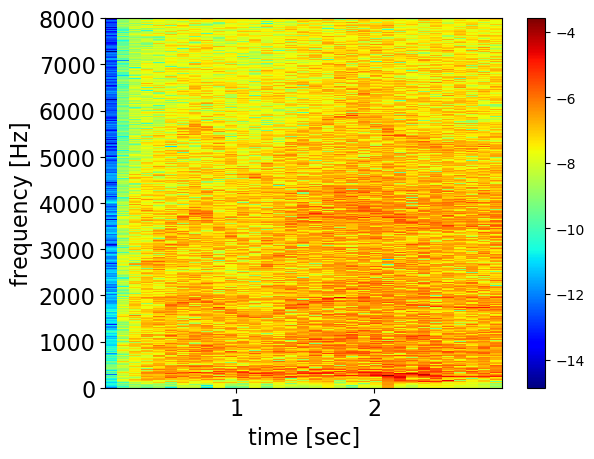

In [3]:
spec = spectrogram(x_drill, convert(Int, 100e-3*fs_desired), convert(Int, 10e-3*fs_desired), fs=fs_desired)
plot_spectrogram(spec, fs_desired);

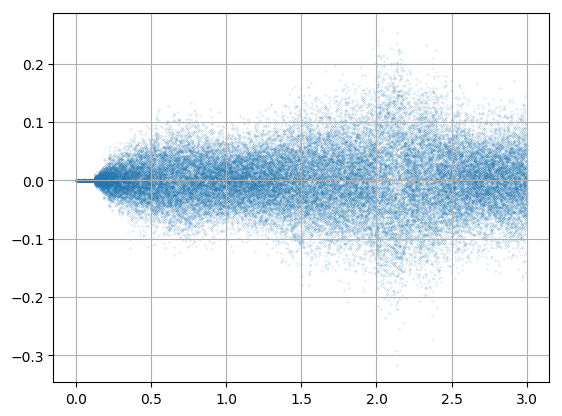

In [4]:
plt.scatter(t,x_drill, 0.01)
plt.grid()

## Calculate spectrum

In [5]:
S = FFTovertime(x_drill, 30, 29, rectangularwindow)
Sr = real.(S)
Si = imag.(S)

47970×30 Array{Float64,2}:
 0.0  -0.00483146    0.00082237    0.000130083  …  -0.00082237    0.00483146 
 0.0  -0.00404173    0.000189384   0.000391594     -0.000189384   0.00404173 
 0.0  -0.00308106   -0.000487501   0.000487412      0.000487501   0.00308106 
 0.0  -0.00203951   -0.00118532    0.000244991      0.00118532    0.00203951 
 0.0  -0.000989347  -0.00183569   -0.000318633      0.00183569    0.000989347
 0.0   2.70648e-5   -0.00231928   -0.000978214  …   0.00231928   -2.70648e-5 
 0.0   0.000981786  -0.00252022   -0.00143521       0.00252022   -0.000981786
 0.0   0.00185357   -0.00236369   -0.00145717       0.00236369   -0.00185357 
 0.0   0.00262507   -0.00183617   -0.000977033      0.00183617   -0.00262507 
 0.0   0.00328476   -0.00098544   -0.000115445      0.00098544   -0.00328476 
 0.0   0.00377844   -8.24122e-6    0.000726771  …   8.24122e-6   -0.00377844 
 0.0   0.00407187    0.000901679   0.0011921       -0.000901679  -0.00407187 
 0.0   0.00416366    0.00160937    0.

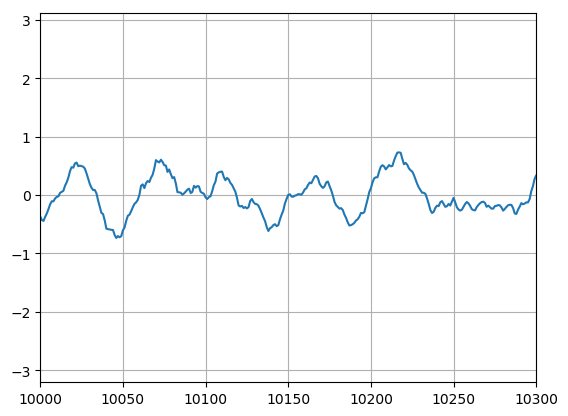

(10000, 10300)

In [6]:
plt.plot(Sr[:,1])
plt.grid()
plt.xlim(10000,10300)

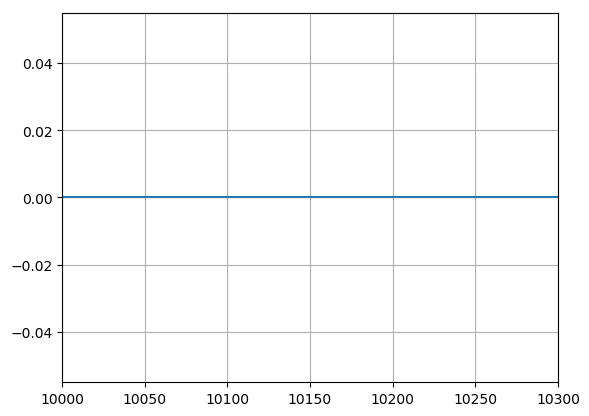

(10000, 10300)

In [7]:
plt.plot(Si[:,1])
plt.grid()
plt.xlim(10000,10300)

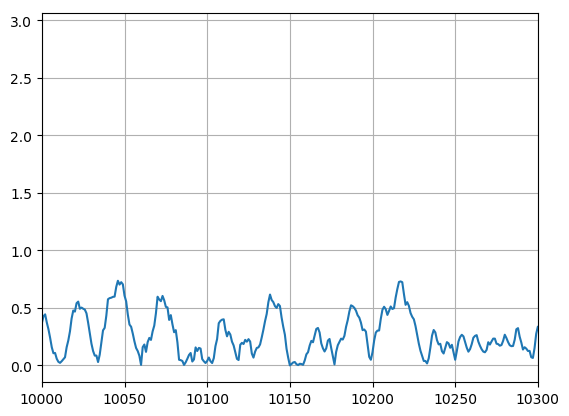

(10000, 10300)

In [8]:
plt.plot(abs.(S[:,1]))
plt.grid()
plt.xlim(10000,10300)

## Inference

In [9]:
# parameters
AR_order = 1
iterations = 100
Λ_meas = 1e10

# create factor graphs
fg = FactorGraph()

# AR node
@RV γ ~ ForneyLab.Gamma(placeholder(:a_γ), placeholder(:b_γ))
@RV θ ~ GaussianMeanPrecision(placeholder(:μ_θ, dims=(AR_order,)), placeholder(:Λ_θ, dims=(AR_order, AR_order)))
@RV Sprev ~ GaussianMeanPrecision(placeholder(:μ_Sprev, dims=(AR_order,)), placeholder(:Λ_Sprev, dims=(AR_order, AR_order)))
@RV S ~ LAR.AR.Autoregressive(θ, Sprev, γ)

# selection and input
d = zeros(AR_order)
d[1] = 1
@RV x ~ DotProduct(d, S)
@RV v ~ GaussianMeanPrecision(0, Λ_meas)
@RV y = x + v
placeholder(y, :y)

ForneyLab.draw(fg, external_viewer=:default)

Process(`cmd /c start 'C:\Users\s151781\AppData\Local\Temp\jl_C02D.tmp.svg'`, ProcessExited(0))

In [10]:
# recognition factorization
q = RecognitionFactorization(θ, γ,ids=[:Θ :γ])
algo = compatibility_fix(variationalAlgorithm(q))
Falgo = freeEnergyAlgorithm()
eval(Meta.parse(algo));
eval(Meta.parse(Falgo));

In [ ]:
current_a_γ = 1
current_b_γ = 0.0001
current_Λ_θ = tiny*Ic(AR_order)
current_μ_θ = zeros(AR_order)
current_μ_Sprev = zeros(AR_order)
current_Λ_Sprev = tiny*Ic(AR_order)
F_tot = []
a_γ_tot = []
b_γ_tot = []

p = Progress(length(Sr[:,1]), 1, "Observed ")
marginals = Dict()
marginals[:S] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=zeros(AR_order), w=tiny*Ic(AR_order))
for sr in 1:length(Sr[:,1])
    update!(p, sr)
    marginals[:θ] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_θ, w=current_Λ_θ)
    marginals[:γ] = ProbabilityDistribution(Univariate, Gamma, a=current_a_γ, b=current_b_γ)
    #marginals[:Sprev] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_Sprev, w=current_Λ_Sprev)
    marginals[:v] = ProbabilityDistribution(Univariate, GaussianMeanPrecision, m=0, w=Λ_meas)
    
    #marginals[:S] = ProbabilityDistribution(Multivariate, GaussianMeanPrecision, m=current_μ_Sprev, w=current_Λ_Sprev)
    for it = 1:iterations
        
        data = Dict(:y => Sr[sr,1],
                    :μ_Sprev => current_μ_Sprev,
                    :Λ_Sprev => current_Λ_Sprev,
                    :μ_θ => current_μ_θ,
                    :Λ_θ => current_Λ_θ,
                    :a_γ => current_a_γ,
                    :b_γ => current_b_γ)
        data, marginals = step_all!(data, marginals)
        push!(F_tot, freeEnergy(data, marginals))      
        push!(a_γ_tot, marginals[:γ].params[:a])
        push!(b_γ_tot, marginals[:γ].params[:b])
        
        
        current_μ_θ = mean(marginals[:θ])
        current_Λ_θ = ForneyLab.unsafePrecision(marginals[:θ])
        current_a_γ = marginals[:γ].params[:a]
        current_b_γ = marginals[:γ].params[:b]
    end
    
end

Observed   0%|█                                         |  ETA: 22:07:56┌ Warning: `lgamma(x::Real)` is deprecated, use `(logabsgamma(x))[1]` instead.
│   caller = averageEnergy(::Type{Gamma}, ::ProbabilityDistribution{Univariate,Gamma}, ::ProbabilityDistribution{Univariate,PointMass}, ::ProbabilityDistribution{Univariate,PointMass}) at gamma.jl:86
└ @ ForneyLab C:\Users\s151781\.julia\packages\ForneyLab\Hz4kD\src\factor_nodes\gamma.jl:86
┌ Warning: `lgamma(x::Real)` is deprecated, use `(logabsgamma(x))[1]` instead.
│   caller = differentialEntropy(::ProbabilityDistribution{Univariate,Gamma}) at gamma.jl:78
└ @ ForneyLab C:\Users\s151781\.julia\packages\ForneyLab\Hz4kD\src\factor_nodes\gamma.jl:78
Observed  89%|██████████████████████████████████████    |  ETA: 0:20:12m:57

In [ ]:
if AR_order == 1
    plt.plot(20*log10.(F_tot))
    plt.grid()
    plt.xlabel("iterations")
    plt.ylabel("Free energy [nats]")
end
;

In [ ]:
γ_mode = (a_γ_tot .- 1)./b_γ_tot
γ_mean = a_γ_tot./b_γ_tot
#plt.plot(γ_mode, label="mode")
plt.plot(γ_mean, label="mean")
plt.grid()
plt.legend()